Spam Email Detection Using Machine Learning Algoriths

In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the csv file
columns_name = ['Target','Text','blank_1','blank_2','blank_3']
df = pd.read_csv('spam_email_dataset.csv',names = columns_name)
df.head(5)

,Target,Text,blank_1,blank_2,blank_3
0,v1,v2,NaN,NaN,NaN
1,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
2,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
4,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN


In [3]:
df.drop(columns = ['blank_1','blank_2','blank_3'], axis =1, inplace = True)

In [4]:
df.head(5)

,Target,Text
0,v1,v2
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...


In [5]:
df.drop(index = 0, inplace = True)

In [6]:
df.head(5)

,Target,Text
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
5,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.shape

(5572, 2)

In [8]:
df.isnull().any().sum()

np.int64(0)

In [9]:
df.dropna(inplace = True)

In [10]:
df.duplicated().any().sum()

np.int64(1)

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
spam_counts = df['Target'].value_counts()
print(spam_counts)

Target
ham     4516
spam     647
Name: count, dtype: int64


In [14]:
df.Target.unique()

array(['ham', 'spam'], dtype=object)

In [15]:
df.info

<bound method DataFrame.info of      Target                                               Text
1       ham  Go until jurong point, crazy.. Available only ...
2       ham                      Ok lar... Joking wif u oni...
3      spam  Free entry in 2 a wkly comp to win FA Cup fina...
4       ham  U dun say so early hor... U c already then say...
5       ham  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5568   spam  This is the 2nd time we have tried 2 contact u...
5569    ham              Will �_ b going to esplanade fr home?
5570    ham  Pity, * was in mood for that. So...any other s...
5571    ham  The guy did some bitching but I acted like i'd...
5572    ham                         Rofl. Its true to its name

[5163 rows x 2 columns]>

In [16]:
spam_counts = df['Target'].value_counts()
print(spam_counts)

Target
ham     4516
spam     647
Name: count, dtype: int64


Basic EDA to understand the Dataset Better

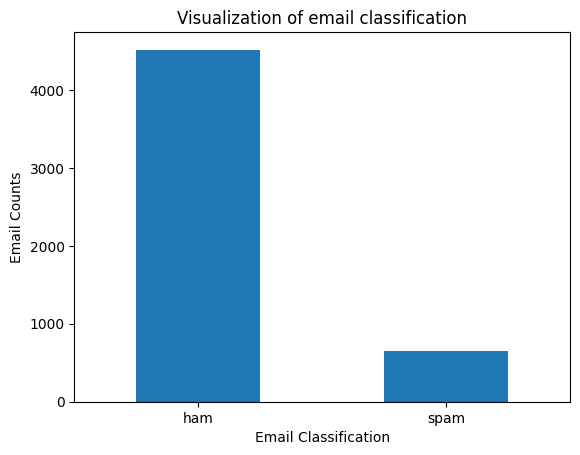

In [17]:
#Basic EDA for better understanding

spam_counts.plot(kind = 'bar')
plt.title('Visualization of email classification')
plt.xlabel('Email Classification')
plt.ylabel('Email Counts')
plt.xticks(rotation = 0)
plt.show()

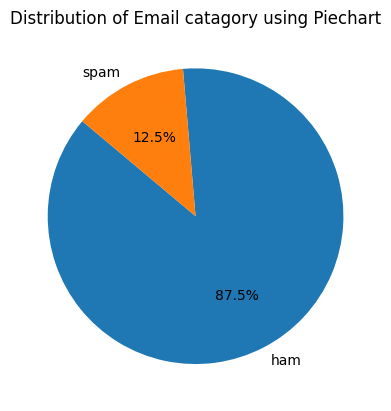

In [18]:
#Pie chart of distribution
plt.pie(spam_counts, labels=spam_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Email catagory using Piechart')
plt.show()


In [19]:
#Importing necessary libraries to NLTK- proprocessing


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [20]:
#Function to preprocess the text

lemmatizer = WordNetLemmatizer() #Initilizing the WordNetLemmatizer 

stop_words = set(stopwords.words('english')) #Intilizing 'English' stopwords

#defining function to preprocess the text
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]','',(text)) #Removing special characters
    text = re.sub(r'https\S+@\W+<[^>]+>#\W+','',text) #removing urls,usernames,html tags,hastags
    text = text.lower() #lowercasing the whole text
    text = word_tokenize(text) #tokenizing the text
    text = [w for w in text if not w.lower() in stop_words] #removing english stopwords from the text
    processed_text = [lemmatizer.lemmatize(words) for words in text] #lemmatizing the text
    return ' '.join(processed_text) #returning the text after all preprocessing steps
    
    

In [21]:
df['Processed_Text'] = df['Text'].apply(preprocess_text) #Creating a new column of pre-process text

In [22]:
df.head(5)

,Target,Text,Processed_Text
1,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
2,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
4,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
5,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though


Preparing the Machine Learning Model

In [23]:
#Vectorizing the dataset with TF-IDF Vectorizer

from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [24]:

X = df['Processed_Text']
y = df['Target'] #processing the model


vectorizer = TfidfVectorizer() #Initilizing the vector
X_tfidf = vectorizer.fit_transform(X)


#splitting the dataset for training and testing purpose
X_train, X_test, y_train, y_test = train_test_split(X_tfidf,y, test_size = 0.2, random_state = 42)

#Applying SMOTE Algorithm to tarining data

smote = SMOTE(random_state = 42)
X_train_res , y_train_res = smote.fit_resample(X_train, y_train)

print('Original dataset shape %s' % Counter(y_train))
print('Original dataset shape %s' % Counter(y_train_res))


Original dataset shape Counter({'ham': 3599, 'spam': 531})
Original dataset shape Counter({'ham': 3599, 'spam': 3599})


In [25]:
#Creating the model

model = MultinomialNB()
model.fit(X_train_res, y_train_res)

MultinomialNB()

In [26]:
y_pred = model.predict(X_test) #predicting the result

In [27]:
print('Accuracy : %s' % accuracy_score(y_test, y_pred))
print('Classification Report : %s' % classification_report(y_test , y_pred, target_names = ['ham','spam']))

Accuracy : 0.9535333978702807
Classification Report :               precision    recall  f1-score   support

         ham       0.98      0.96      0.97       917
        spam       0.75      0.87      0.81       116

    accuracy                           0.95      1033
   macro avg       0.87      0.92      0.89      1033
weighted avg       0.96      0.95      0.95      1033

